## Lab 4

### Import libs and connect to database

In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


### Connect to Database

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [3]:
cur=conn.cursor()

## Q1

In [7]:
sql_Q1 = """
        select * from gp11.student 
        """

In [8]:
df=pandas.read_sql_query(sql_Q1,conn)
df[:]

,s_email,s_name,major
0,lrhaight02@yahoo.com,logan,IA
1,s2@jmu.edu,t2,SOCI
2,s3@jmu.edu,t3,BUS
3,s4@jmu.edu,t4,KIN
4,s5@jmu.edu,None,None
5,s6@jmu.edu,None,None
6,s7@jmu.edu,None,None
7,s8@jmu.edu,None,None
8,s9@jmu.edu,None,None
9,s10@jmu.edu,None,None


## Q2

In [5]:
sql_Q2 = """
        select gp11.professor.p_name,
        gp11.course.c_name
from gp11.professor
inner join gp11.course
on gp11.professor.p_email = gp11.course.p_email
        """

In [9]:
df = pandas.read_sql_query(sql_Q2, conn)
df[:]

,p_name,c_name
0,wei,IA
1,t2,t2
2,t3,t3
3,p5,t6
4,p6,t7
5,p7,t8
6,p8,t9
7,p9,t10
8,Hendrickson,Counterfactual Reasoning
9,Hendrickson,t4


## Q3 

In [10]:
sql_Q3 = """
        select c_number, 
        count(c_number) as enrolled
        from gp11.enroll_list
        group by c_number
        order by enrolled desc
        """

<AxesSubplot:xlabel='c_number'>

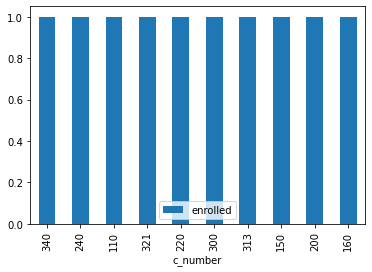

In [12]:
df = pandas.read_sql_query(sql_Q3, conn)
df.plot.bar(y='enrolled',x='c_number')

## Q4

In [17]:
sql_Q4 = """
        select gp11.professor.p_name,
        count (gp11.course.c_name) as teaching_number
        from gp11.professor
        inner join gp11.course
        on gp11.professor.p_email = gp11.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

<AxesSubplot:xlabel='p_name'>

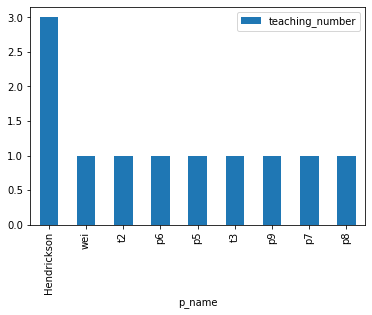

In [18]:
df = pandas.read_sql_query(sql_Q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

## Q5

In [10]:
sql_Q5_professor = """
                   insert into gp11.professor(p_email,p_name,p_office)
                   values('{}','{}','{}')
                """.format ('marrinsp@jmu.edu','Marrin','Engeo2104')

In [11]:
cur.execute(sql_Q5_professor)

InternalError: current transaction is aborted, commands ignored until end of transaction block


In [12]:
conn.rollback()

In [13]:
conn.commit()

In [15]:
df = pandas.read_sql_query('select * from gp11.professor', conn)
df[:]

,p_email,p_name,p_office
0,weixx@dukes.jmu.edu,wei,ISAT112
1,t2@jmu.edu,t2,t2
2,t3@jmu.edu,t3,t3
3,t5@jmu.edu,p5,t5
4,t6@jmu.edu,p6,t6
5,t7@jmu.edu,p7,t7
6,t8@jmu.edu,p8,t8
7,t9@jmu.edu,p9,t9
8,Hendrickson@jmu.edu,Hendrickson,IA1204
9,marrinsp@jmu.edu,Marrin,Engeo2104


In [12]:
Q5_insert_course_sql = """
                   insert into gp11.course(c_number,c_name,c_room,p_email)
                   values('{}','{}','{}','{}')
                """.format ('ia_new','new_c_name','online','marrinsp@jmu.edu')

In [13]:
cur.execute(sql_Q5_course)

In [14]:
conn.commit()

In [15]:
df = pandas.read_sql_query('select * from gp11.course', conn)
df[:]

,c_number,c_name,c_room,p_email
0,340,IA,336,weixx@dukes.jmu.edu
1,300,t2,6125,t2@jmu.edu
2,313,t3,150,t3@jmu.edu
3,150,t6,cB,t5@jmu.edu
4,220,t7,cC,t6@jmu.edu
5,160,t8,cD,t7@jmu.edu
6,200,t9,cE,t8@jmu.edu
7,321,t10,cF,t9@jmu.edu
8,500,Counterfactual Reasoning,IA150,Hendrickson@jmu.edu
9,110,t4,1204,Hendrickson@jmu.edu


## Q6

In [36]:
Q6_update_course_sql = """
                  update gp11.course
                  set p_email= '{}'
                  where p_email= '{}'
                """.format('marrinsp@jmu.edu','t9@jmu.edu')

In [37]:
cur.execute(Q6_update_course_sql)

In [35]:
conn.rollback()

In [38]:
conn.commit()

In [39]:
df_student=pandas.read_sql_query('select * from gp11.course',conn)
df_student[:]

,c_number,c_name,c_room,p_email
0,340,IA,336,weixx@dukes.jmu.edu
1,300,t2,6125,t2@jmu.edu
2,313,t3,150,t3@jmu.edu
3,150,t6,cB,t5@jmu.edu
4,220,t7,cC,t6@jmu.edu
5,160,t8,cD,t7@jmu.edu
6,200,t9,cE,t8@jmu.edu
7,500,Counterfactual Reasoning,IA150,Hendrickson@jmu.edu
8,110,t4,1204,Hendrickson@jmu.edu
9,240,t5,cA,Hendrickson@jmu.edu


In [40]:
sql_Q6_professor = """
                    delete from gp11.professor
                    where p_email = '{}'
                """.format('t9@jmu.edu')

In [41]:
cur.execute(sql_Q6_professor)

In [42]:
conn.commit()

In [43]:
df=pandas.read_sql_query('select * from gp11.professor',conn)
df[:]

,p_email,p_name,p_office
0,weixx@dukes.jmu.edu,wei,ISAT112
1,t2@jmu.edu,t2,t2
2,t3@jmu.edu,t3,t3
3,t5@jmu.edu,p5,t5
4,t6@jmu.edu,p6,t6
5,t7@jmu.edu,p7,t7
6,t8@jmu.edu,p8,t8
7,Hendrickson@jmu.edu,Hendrickson,IA1204
8,marrinsp@jmu.edu,Marrin,Engeo2104


## Close Connection

In [44]:
cur.close()

In [45]:
conn.close()